In [1]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('./'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


./mnist.ipynb
./mnist_test.csv
./mnist_train.csv
./.ipynb_checkpoints\mnist-checkpoint.ipynb


In [2]:
train_df = pd.read_csv('./mnist_train.csv', header = None)
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
test_df = pd.read_csv('./mnist_test.csv', header = None)
test_df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train_df.shape

(60000, 785)

In [5]:
X_train = train_df.drop([0], axis=1)
y_train = train_df[0]

In [6]:
X_test = test_df.drop([0], axis=1)
y_test = test_df[0]

In [7]:
X_train.shape

(60000, 784)

In [8]:
# Normalize the data
X_train = X_train / 255.0
X_test = X_test / 255.0

In [9]:
X_train = X_train.values.reshape(-1,28,28,1)
X_test = X_test.values.reshape(-1,28,28,1)

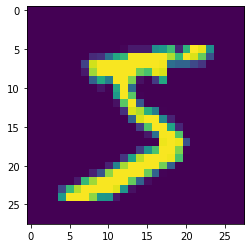

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(X_train[0][:,:,0])

In [11]:
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [12]:
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

In [13]:
input_size = 784
output_size = 10
hidden_layer_size = 200

number_of_neurons = [ [200,200,300],
                      [400,200,300],
                      [500,200,200], 
                      [300,400,600],
                      [600,500,400] ]

In [14]:
idx = 0

x = []
y = []

while idx < 5 :
    
    model = tf.keras.Sequential([
                            tf.keras.layers.Flatten(input_shape=(28,28,1)),
                            tf.keras.layers.Dense(number_of_neurons[idx][0], activation='relu'),
                            tf.keras.layers.Dense(number_of_neurons[idx][1], activation='relu'),
                            tf.keras.layers.Dense(number_of_neurons[idx][2], activation='relu'),   
                            tf.keras.layers.Dense(output_size, activation='softmax')   
                            ]) 
    
    model.summary()
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    NUM_EPOCHS = 100

    model.fit(X_train,y_train, batch_size=10000, epochs = NUM_EPOCHS, validation_data=(X_test,y_test), verbose=0)
    
    y_predict = model.predict(X_test)
    
    y_pred = []
    
    for val in y_predict:
        y_pred.append(np.argmax(val))

    accuracy = metrics.accuracy_score(np.argmax(y_test,axis = 1) ,y_pred)
    recall = metrics.recall_score(np.argmax(y_test,axis = 1) ,y_pred,average='macro')
    precision = metrics.precision_score(np.argmax(y_test,axis = 1) ,y_pred,average='macro')
    f1_score = metrics.f1_score(np.argmax(y_test,axis = 1) ,y_pred,average='macro')
    cm = metrics.confusion_matrix(np.argmax(y_test,axis = 1) ,y_pred)
    print(cm)
    print("Accuracy:",accuracy)
    print("F1 score:",f1_score)
    print("Recall:",recall)
    print("Precision:",precision)
    print("\n\n\n")
    
    x.append(sum(number_of_neurons[idx]))
    y.append(accuracy)
    
    idx = idx + 1

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 200)               157000    
                                                                 
 dense_1 (Dense)             (None, 200)               40200     
                                                                 
 dense_2 (Dense)             (None, 300)               60300     
                                                                 
 dense_3 (Dense)             (None, 10)                3010      
                                                                 
Total params: 260,510
Trainable params: 260,510
Non-trainable params: 0
_________________________________________________________________
[[ 970    1    0    0    1    0    3    1    4    

In [15]:
print(x)

[700, 900, 900, 1300, 1500]


In [18]:
print(y)

[0.9785, 0.981, 0.9815, 0.9797, 0.9808]


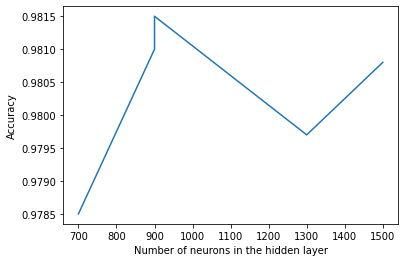

In [17]:
import matplotlib.pyplot as plt
# Plot the graph of error vs learning rate
plt.plot(x, y)
plt.xlabel('Number of neurons in the hidden layer')
plt.ylabel('Accuracy')
plt.show()